# 9. Filters

### Por: David Alonso Rueda Rodríguez

### Objetivo:
- Aplicar filtros a la primera componente principal

#### Esta actividad requiere la ejecución de las siguentes librerías:

- scikit-image
- rasterio
- numpy
- earthpy

### Explicación uso de filtro en primera componente principal
Se aplicarán filtros a la primera componente principal porque está presenta los datos con la mayor variabilidad

In [133]:
from skimage import filters
import rasterio as ras
import earthpy.plot as ep
import numpy as np
import os

### Filtros a ACP[0] de imagen Landsat

In [8]:
landsat_url = 'src/Sentinel/earthpy/Sentinel_PCA.tif'
sentinel_url = 'src/Landsat/earthpy/Landsat_PCA.tif'
urls = [landsat_url, sentinel_url]

In [9]:
#
# Carga de imágenes a lista para procesamiento mediante bucle
imgs = [ras.open(url) for url in urls]
filters_images = []

In [4]:
#
#   El tipo de datos entregado para as Componentes principales fue Compejo de 32 bits,
# para aplicar filtros es necesario transformar a datos enteros o flotantes
# 
#   En la siguiente línea se usa comprensión de listas y transformación de tipo de
# datos
#
imgs_float = [np.array(img.read(1), dtype='f') for img in imgs]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [5]:
#
# Aplicar filtros a imágenes
#
# Aplicar filtro de mediana
images_filter_median = [filters.median(img) for img in imgs_float]
#
# Aplicar filtro de paso alto
images_filter_sobel = [filters.sobel(img) for img in imgs_float]

In [122]:
#
# Ubicación de archivos de salida
median_outurls = [os.path.join(os.path.split(out_url)[0],os.path.split(out_url)[1].replace('PCA', 'Fil-Mdn')) for out_url in urls]
sober_outurls = [os.path.join(os.path.split(out_url)[0],os.path.split(out_url)[1].replace('PCA', 'Fil-Sbh')) for out_url in urls]

Los archivos de salida deben tener un tipo de datos consecuente con la matriz generada por los filtros, por esta razón se copian los metadatos de las imágenes de entrada, y se editan específicamente los tipos de datos 

In [117]:
#
# Cambio del tipo de datos en los diccionarios que describen las imágenes
metas = [i.meta.copy() for i in imgs]
for meta in metas:
    meta['dtype']='float32'

In [125]:
#
# Guardar imágenes de filtros de media
for i in range(len(median_outurls)):
    with ras.open(median_outurls[i], 'w', **metas[i]) as dst:
        dst.write(images_filter_median[i], 1)

In [126]:
#
# Guardar imágenes de filtros de sobel
for i in range(len(sober_outurls)):
    with ras.open(sober_outurls[i], 'w', **metas[i]) as dst:
        dst.write(images_filter_sobel[i], 1)


## Visualización de imáges generadas

### Filtro de Sobel h -Ejemplo filtro paso alto-

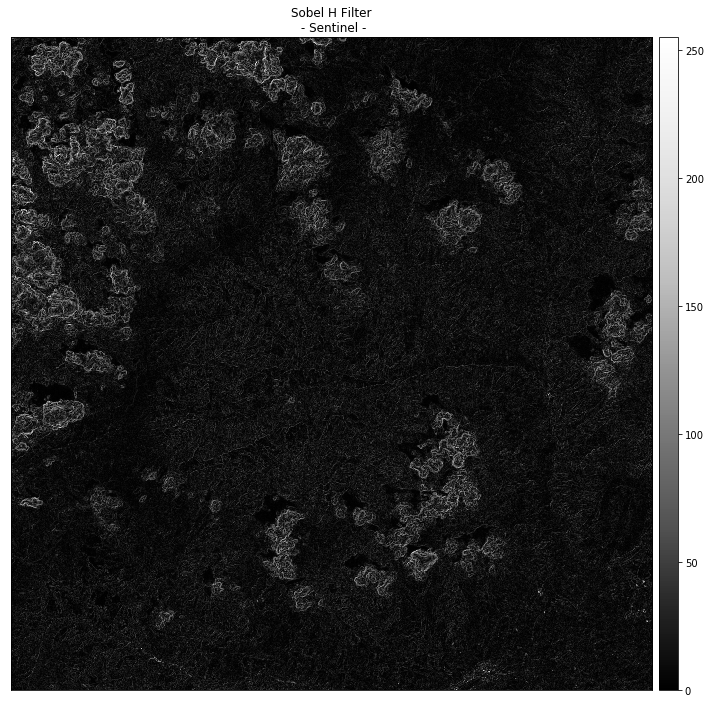

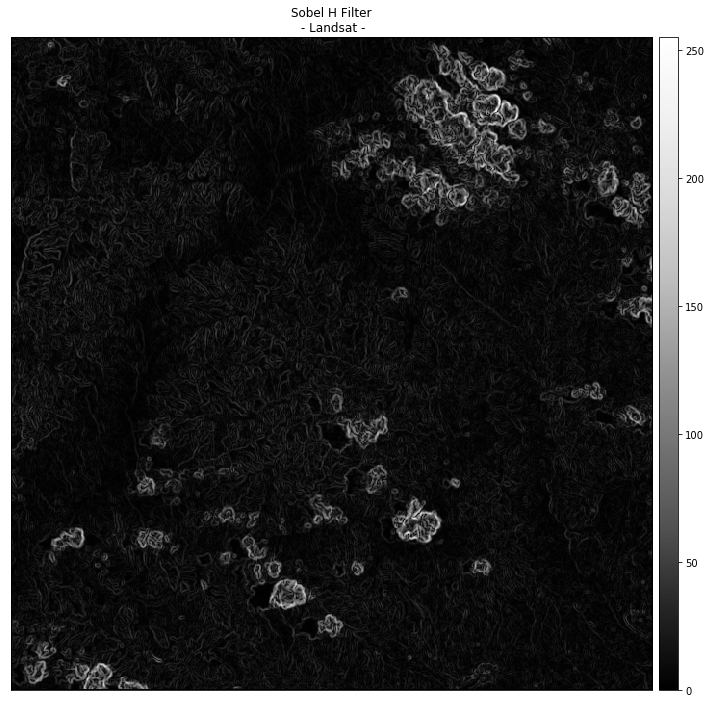

In [137]:
#
# Verificar el resultado de la operación
for i in sober_outurls:
    title="Sobel H Filter\n - {} -" . format(os.path.split(i)[1].split('_')[0])
    ep.plot_bands(ras.open(i).read(1), figsize=(12,12), scale=True, title=title)


### Filtro de Sobel h -Ejemplo filtro paso bajo-

In [ ]:
 median_outurls

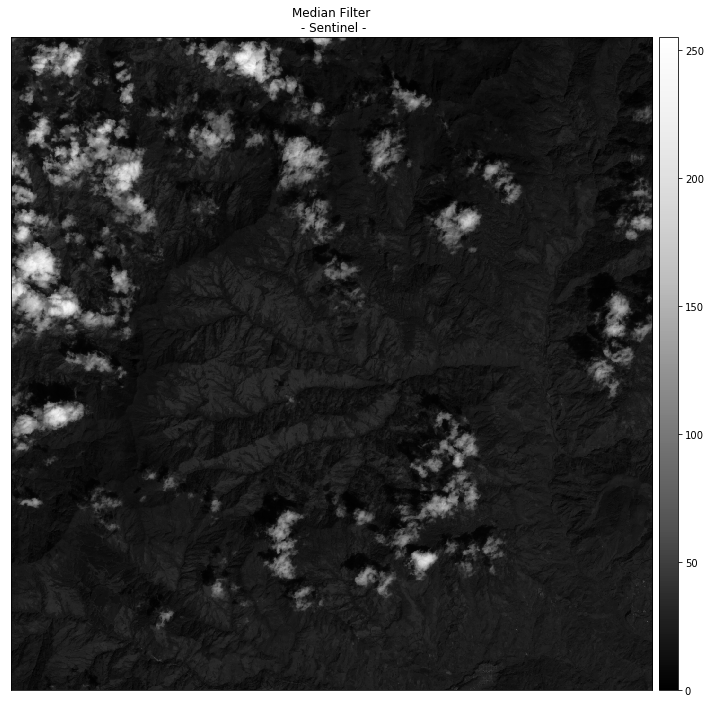

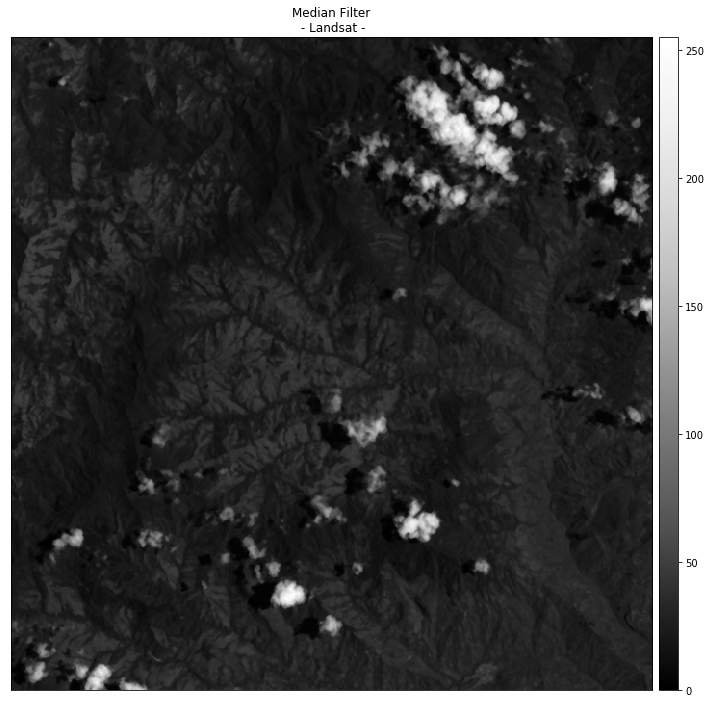

In [139]:
#
# Verificar el resultado de la operación
for i in median_outurls:
    title="Median Filter\n - {} -" . format(os.path.split(i)[1].split('_')[0])
    ep.plot_bands(ras.open(i).read(1), figsize=(12,12), scale=True, title=title)